<h1>Using Scikit-Learn to train models</h1>

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from collections import Counter
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

#Check to see if stratify worked as expected
print(f"Label Counts in y: {Counter(y)}")
print(f"Label count in y_train: {Counter(y_train)}")
print(f"Label counts in y_test: {Counter(y_test)}")

#Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

ppn = Perceptron(eta0 = 0.01 , random_state = 1)
ppn.fit(X_train_std,y_train)
y_pred = ppn.predict(X_test_std)

print(f"missclassified values: {np.sum(y_pred != y_test)}")
print(f"missclassified percentage: {np.round(np.sum(y_pred != y_test)/len(y_test),3)}")
print(f"manually calculated accuracy: {np.round(np.sum(y_pred == y_test)/len(y_test),3)}")
print(f"sklearn calculated accuracy score: {np.round(accuracy_score(y_test,y_pred),3)}")






Label Counts in y: Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})
Label count in y_train: Counter({np.int64(0): 35, np.int64(2): 35, np.int64(1): 35})
Label counts in y_test: Counter({np.int64(2): 15, np.int64(0): 15, np.int64(1): 15})
missclassified values: 2
missclassified percentage: 0.044
manually calculated accuracy: 0.956
sklearn calculated accuracy score: 0.956


<h1>Make Plots</h1>

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's','^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0], 
            X_test[:, 1],
            c='none', 
            edgecolor='black', alpha=1.0,
            linewidth=1,
            marker='o',
            s=100, 
            label='Test set'
        )

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


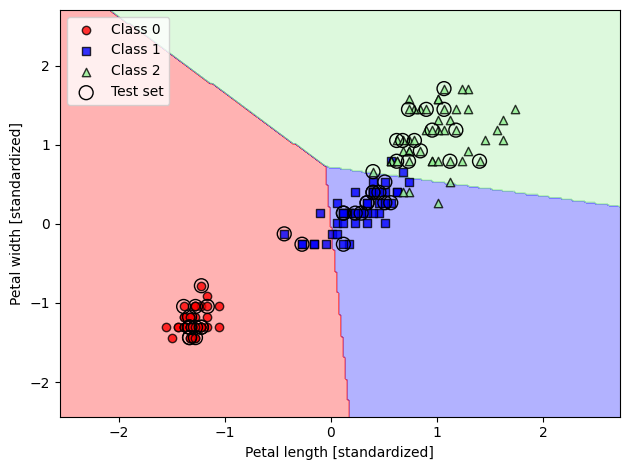

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
y=y_combined,
classifier=ppn,
test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Quick Note: Perceptron doesnt perform well here because the classes are not linear seperable, in the future we will use a different classification technique that is a better fit. This is one reason  Perceptron is not widely used, data is rarely completely linearly seperable.